<a href="https://colab.research.google.com/github/saniya1027108/Weather-Classification/blob/main/Weather_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

Mounting the dataset from google drive


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.8.0
Hub version: 0.12.0
GPU is available


Importing the required libraries

In [4]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PROJECTS/Weather Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise1.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise118.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise103.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise106.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise102.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise107.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise111.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise10.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise11.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise112.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise114.jpg
/content/drive/MyDrive/PROJECTS/Weather Classification/dat

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import keras.layers.normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.python.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.utils.np_utils import to_categorical
%matplotlib inline


In [6]:
image_dir = '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset'

In [7]:
import os 

# Walkthrough directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/PROJECTS/Weather Classification/dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 4 directories and 0 images in '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset'. 
There are 0 directories and 357 images in '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise'. 
There are 0 directories and 215 images in '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Rain'. 
There are 0 directories and 253 images in '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Shine'. 
There are 0 directories and 300 images in '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Cloudy'. 


Analysing our data

In [8]:
classes = []
for dir in os.listdir("/content/drive/MyDrive/PROJECTS/Weather Classification/dataset"):
  classes.append(dir)

len(classes)

4

In [9]:
cloudy_images  = os.listdir(image_dir + '/Cloudy')
cloudy_images[:5]

['cloudy101.jpg',
 'cloudy102.jpg',
 'cloudy105.jpg',
 'cloudy103.jpg',
 'cloudy1.jpg']

In [10]:
rainy_images = os.listdir(image_dir + '/Rain')
shine_images = os.listdir(image_dir + '/Shine')
sunrise_images = os.listdir(image_dir + '/Sunrise')

In [11]:
import pathlib
image_dir = pathlib.Path("/content/drive/MyDrive/PROJECTS/Weather Classification/dataset")
class_names = np.array(sorted([item.name for item in image_dir.glob("*")]))
print(class_names)

['Cloudy' 'Rain' 'Shine' 'Sunrise']


Visualizing Random Images from the Dataset

In [12]:
import random

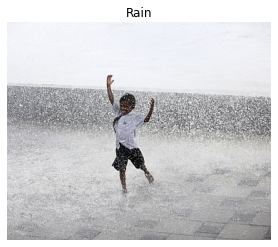

In [13]:
# Visualizing random images from the dataset
labels = os.listdir(image_dir)
random_label = random.choice(labels)
path = os.path.join(image_dir, random_label)
file_path = os.path.join(path, random.choice(os.listdir(path)))

img = plt.imread(file_path)
plt.imshow(img)
plt.title(random_label, color = "black")
plt.axis(False);

In [14]:
all_files = []
for elem in os.listdir(image_dir):
  path = os.path.join(image_dir, elem)
  for x in os.listdir(path):
    img_path = os.path.join(path, x)
    all_files.append(img_path)

all_files[:10]

['/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise1.jpg',
 '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise118.jpg',
 '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise103.jpg',
 '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise106.jpg',
 '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise102.jpg',
 '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise107.jpg',
 '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise111.jpg',
 '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise10.jpg',
 '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise11.jpg',
 '/content/drive/MyDrive/PROJECTS/Weather Classification/dataset/Sunrise/sunrise112.jpg']

In [15]:
len(all_files)

1125

In [16]:
#Image Preprocessing
Image_size = (224,244)

def load_and_prep(filepath, normalize=False):

  #Read the image file
  img = tf.io.read_file(filepath)
  #converting into tensors
  img = tf.io.decode_image(img)
  #resize image
  img = tf.image.resize(img, Image_size)
  #Normalizing the Image
  if normalize:
    img = img/255

  return img

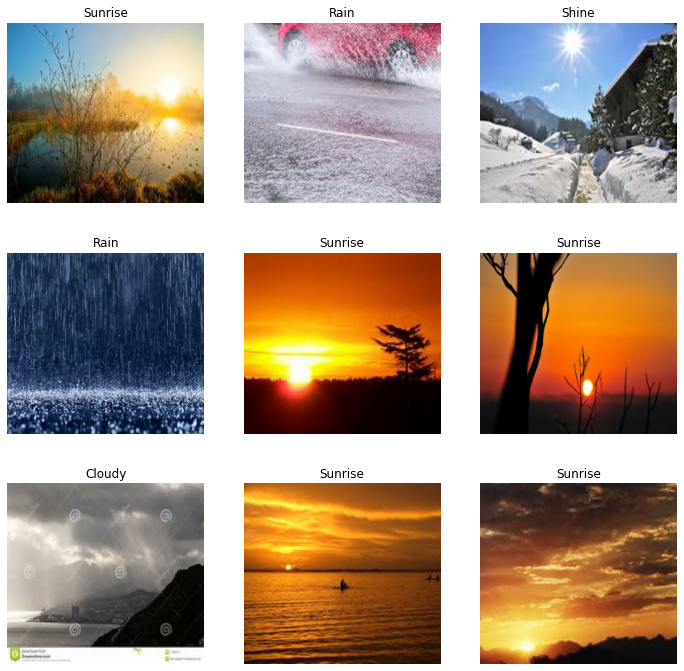

In [17]:
# Plotting multiple random images
plt.figure(figsize=(12, 12))
for i in range(9):
  random_img_path = random.choice(all_files)
  random_label = random_img_path.split("/")[7]
  img = load_and_prep(random_img_path, normalize=True)

  # Plotting the images
  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(random_label, color="black")
  plt.axis(False);


TRAIN-TEST-SPLIT


In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    image_dir,
    target_size=(250 , 250),
    batch_size= 32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    image_dir, # same directory as training data
    target_size=(250, 250),
    batch_size= 32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


Model 1

In [19]:
#LeNet Model
num_classes = 4

lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(250,250,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(num_classes, activation='softmax') #Output layer
])

In [20]:
lenet_5_model.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(lr = 0.001) , metrics = 'accuracy')

lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 125, 125, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 121, 16)      2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 60, 60, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 120)       48120     
                                                                 
 flatten (Flatten)           (None, 376320)            0

MODEL (LENET 5)

In [21]:
model_1= lenet_5_model.fit(train_generator,
                  epochs = 10,
                  validation_data= validation_generator )

Epoch 1/10
29/29 [==============================] - 247s 8s/step - loss: 2.7907 - accuracy: 0.5017 - val_loss: 2.5023 - val_accuracy: 0.4375
Epoch 2/10
29/29 [==============================] - 29s 997ms/step - loss: 2.0225 - accuracy: 0.5250 - val_loss: 1.7114 - val_accuracy: 0.4643
Epoch 3/10
29/29 [==============================] - 29s 988ms/step - loss: 1.3671 - accuracy: 0.5694 - val_loss: 1.2994 - val_accuracy: 0.5134
Epoch 4/10
29/29 [==============================] - 29s 1s/step - loss: 0.9862 - accuracy: 0.5560 - val_loss: 1.1939 - val_accuracy: 0.3571
Epoch 5/10
29/29 [==============================] - 29s 994ms/step - loss: 1.3701 - accuracy: 0.4151 - val_loss: 1.2800 - val_accuracy: 0.3393
Epoch 6/10
29/29 [==============================] - 29s 998ms/step - loss: 1.0118 - accuracy: 0.5105 - val_loss: 1.4323 - val_accuracy: 0.3571
Epoch 7/10
29/29 [==============================] - 29s 995ms/step - loss: 1.1332 - accuracy: 0.4661 - val_loss: 0.9624 - val_accuracy: 0.5982
Epoc

In [22]:
lenet_5_model.evaluate(train_generator)

29/29 [==============================] - 22s 758ms/step - loss: 0.8389 - accuracy: 0.6004


[0.838862419128418, 0.600443959236145]

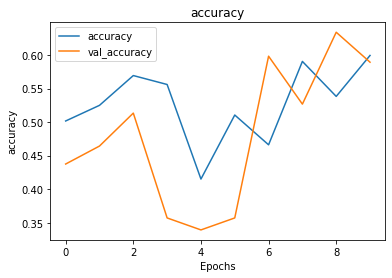

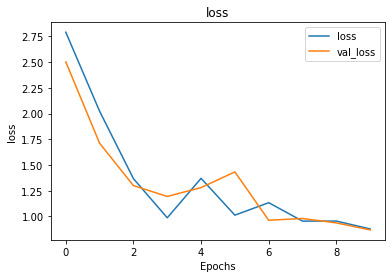

In [23]:
def plot_graphs(model_1, string):
  plt.plot(model_1.history[string])
  plt.plot(model_1.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(model_1, "accuracy")
plot_graphs(model_1, "loss")

MODEL 2

In [24]:
num_classes = 4

# defining model
model_2= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), input_shape = (250 , 250 , 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(64, (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(128 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, seed = 5),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(num_classes , activation = 'softmax')])

In [25]:
# getting model summary after compiling
model_2.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(lr = 0.001) , metrics = 'accuracy')

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 246, 246, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 82, 82, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 78, 78, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)       

In [26]:
history_2= model_2.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 10 ) 
          

Epoch 1/10
29/29 [==============================] - 31s 1s/step - loss: 0.8757 - accuracy: 0.5694 - val_loss: 0.7455 - val_accuracy: 0.6607
Epoch 2/10
29/29 [==============================] - 29s 1s/step - loss: 0.6992 - accuracy: 0.7214 - val_loss: 0.7185 - val_accuracy: 0.7366
Epoch 3/10
29/29 [==============================] - 29s 1s/step - loss: 0.6134 - accuracy: 0.7758 - val_loss: 0.5447 - val_accuracy: 0.7723
Epoch 4/10
29/29 [==============================] - 29s 1s/step - loss: 0.4615 - accuracy: 0.8147 - val_loss: 0.5401 - val_accuracy: 0.8259
Epoch 5/10
29/29 [==============================] - 29s 1s/step - loss: 0.5008 - accuracy: 0.7936 - val_loss: 0.7006 - val_accuracy: 0.7366
Epoch 6/10
29/29 [==============================] - 29s 1s/step - loss: 0.4703 - accuracy: 0.8124 - val_loss: 0.6104 - val_accuracy: 0.7098
Epoch 7/10
29/29 [==============================] - 29s 991ms/step - loss: 0.4144 - accuracy: 0.8346 - val_loss: 0.5228 - val_accuracy: 0.8125
Epoch 8/10
29/29 

In [27]:
model_2.evaluate(train_generator)

29/29 [==============================] - 22s 763ms/step - loss: 0.4444 - accuracy: 0.8024


[0.44443178176879883, 0.8024417161941528]

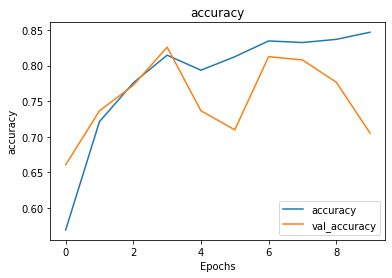

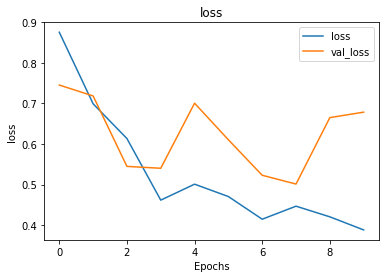

In [28]:
def plot_graphs(model_2, string):
  plt.plot(history_2.history[string])
  plt.plot(history_2.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

MODEL 3 (EfficientNetB0)

In [29]:
from tensorflow.keras.layers.experimental import preprocessing

In [30]:
# Creating data augmentation layer
data_augmentation = tf.keras.Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomZoom(0.2),
   preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name="data_augmentation_layer")

In [31]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setting up input layer
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x) 
model_3 = tf.keras.Model(inputs, outputs)

# compiling the model
model_3.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 10 ) 

16719872/16705208 [==============================] - 0s 0us/step
Epoch 1/10
29/29 [==============================] - 49s 1s/step - loss: 1.3827 - accuracy: 0.2841 - val_loss: 1.3749 - val_accuracy: 0.3170
Epoch 2/10
29/29 [==============================] - 35s 1s/step - loss: 1.3771 - accuracy: 0.2997 - val_loss: 1.3842 - val_accuracy: 0.3170
Epoch 3/10
29/29 [==============================] - 34s 1s/step - loss: 1.3788 - accuracy: 0.3019 - val_loss: 1.3838 - val_accuracy: 0.3170
Epoch 4/10
29/29 [==============================] - 34s 1s/step - loss: 1.3777 - accuracy: 0.2997 - val_loss: 1.3857 - val_accuracy: 0.3170
Epoch 5/10
29/29 [==============================] - 34s 1s/step - loss: 1.3829 - accuracy: 0.2730 - val_loss: 1.4038 - val_accuracy: 0.3170
Epoch 6/10
29/29 [==============================] - 34s 1s/step - loss: 1.4005 - accuracy: 0.2730 - val_loss: 1.3882 - val_accuracy: 0.3170
Epoch 7/10
29/29 [==============================] - 34s 1s/step - loss: 1.3761 - accuracy: 0.29

In [32]:
model_3.evaluate(train_generator)

29/29 [==============================] - 23s 790ms/step - loss: 1.3861 - accuracy: 0.3174


[1.3860639333724976, 0.31742507219314575]

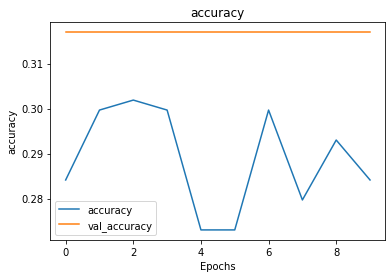

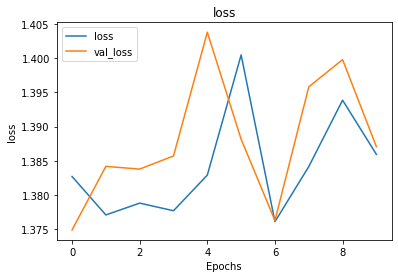

In [33]:
def plot_graphs(model_3, string):
  plt.plot(history_3.history[string])
  plt.plot(history_3.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

model 4 (ResNET 50)

In [34]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False

# Setting up input layer
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = data_augmentation(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x) 
model_4 = tf.keras.Model(inputs, outputs)

# compiling the model
model_4.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_4 = model_4.fit(train_generator,
                        epochs=5,
                        validation_data=validation_generator,
                        validation_steps=0.25 * len(validation_generator))

94683136/94668760 [==============================] - 1s 0us/step
Epoch 1/5
29/29 [==============================] - 64s 2s/step - loss: 1.4126 - accuracy: 0.2752 - val_loss: 1.3615 - val_accuracy: 0.3906
Epoch 2/5
29/29 [==============================] - 50s 2s/step - loss: 1.3813 - accuracy: 0.2941 - val_loss: 1.3880 - val_accuracy: 0.2969
Epoch 3/5
29/29 [==============================] - 45s 2s/step - loss: 1.3741 - accuracy: 0.2708 - val_loss: 1.3418 - val_accuracy: 0.3594
Epoch 4/5
29/29 [==============================] - 45s 2s/step - loss: 1.3582 - accuracy: 0.3119 - val_loss: 1.4194 - val_accuracy: 0.2500
Epoch 5/5
29/29 [==============================] - 42s 1s/step - loss: 1.3644 - accuracy: 0.2897 - val_loss: 1.4318 - val_accuracy: 0.2031


In [35]:
model_4.evaluate(train_generator)

29/29 [==============================] - 25s 850ms/step - loss: 1.3532 - accuracy: 0.3174


[1.353183388710022, 0.31742507219314575]

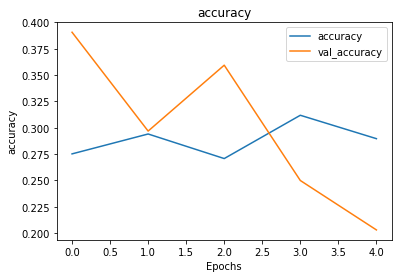

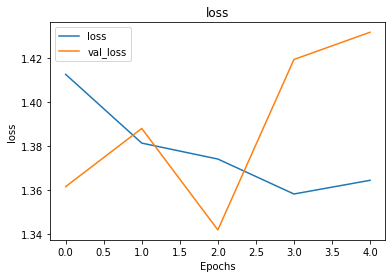

In [36]:
def plot_graphs(model_4, string):
  plt.plot(history_4.history[string])
  plt.plot(history_4.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_4, "accuracy")
plot_graphs(history_4, "loss")